# Video Games Sales Analysis And Visualization

Story is that, one of my roommate "Jaber" who playing video games too much and love it much also. One day he came into my room and asked me about some stat and figure about video games, i said bro i dont know much about video games sorry for that but i can help you another way, that i know a good data sate which have much info about games.

so i can show you this data set and you ask me whatever you want to know i will try to find out. ok?

He was very happy on my offer. and he just starting many question at once. i said wait bro i need to go import them first to start analysis. be patient

/kaggle/input/videogamesales/vgsales.csv

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
data.head()

Me => See, here is your video games data.

In [ ]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

In [ ]:
data.shape

In [ ]:
data.info()

Their fields and data types are:

- Rank - Ranking of overall sales, integer

- Name - The games name

- Platform - Platform of the games release (i.e. PC,PS4, etc.), object

- Year - Year of the game's release, float

- Genre - Genre of the game ,object

- Publisher - Publisher of the game, object

- NA_Sales - Sales in North America (in millions), float

- EU_Sales - Sales in Europe (in millions), float

- JP_Sales - Sales in Japan (in millions), float

- Other_Sales - Sales in the rest of the world (in millions), float

- Global_Sales - Total worldwide sales, float

In [ ]:
data.describe()


In [ ]:
data.isnull().sum()

## 1. What genre games have been made the most?

In [ ]:
data['Genre'].value_counts()

In [ ]:
plt.figure(figsize=(15, 10))

sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

Answer is => "Action" and "Sports"

## 2. Which year had the most game release?

In [ ]:
plt.figure(figsize=(15,10))

sns.countplot(x="Year", data=data, order=data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

Answer is =>   
1. 2009.0 -> 1431   
2. 2008.0 -> 1428   
3. 2010.0 -> 1259   
4. 2007.0 -> 1202   
5. 2011.0 -> 1139   

## 3. Top 5 years games release by genre.


In [ ]:
plt.figure(figsize=(30, 10))
sns.countplot(x='Year', data=data, hue='Grenre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

## 4. Which year had the highest sales worldwide?

In [ ]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

Answer is =>
1. 2008.0 678.90
2. 2009.0 667.30
3. 2007.0 611.13
4. 2010.0 600.45
5. 2006.0 521.04

- interesting 2006 was not in top 5 game release year but it is in top 5 highest sale year

## 5. Which genre game has been released the most in a single year?

In [ ]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
# year_max_genre

In [ ]:
genre = year_max_genre['Genre'].values
# genre[0]

In [ ]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()


Answer is => 2009 Action ---> 272 and 2012 Action ---> 266 games are release.

## 6. Which genre game has sold the most in a single year?

In [ ]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
# year_sale_max

In [ ]:
genre = year_sale_max['Genre']

In [ ]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

Answer is => 2009 Action ---> 139.36 million and 2008 Action ---> 136.39 miliion .


## 7. Which genre game have the highest sale price globally

In [ ]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
# data_genre

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)

- Action and Sports are always in top. but in third whis is remarkable "Shooter", in count which was no 5

## 8. Which platfrom have the highest sale price globally

In [ ]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
# data_platform

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

- The winner is PS2

## 9. Which individual game have the highest sale price globally?

In [ ]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
# top_game_sale

In [ ]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

In [ ]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

- And The winner is Wii Sports

## 10. Sales compearison by genre

In [ ]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

## 11. Sales compearison by platform

In [ ]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

In [ ]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [ ]:
# comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

In [ ]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## 12. Top 20 Publisher

In [ ]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()
# top_publisher

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

## 13. Top global sales by publisher

In [ ]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
# sale_pbl

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

## 14. publisher comperison

In [ ]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

In [ ]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)
# comp_publisher

In [ ]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

In [ ]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

## 15. Top publisher by Count each year

In [ ]:
top_publisher =  data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)
# top_publisher_count

In [ ]:
publisher= top_publisher_count['Publisher']

In [ ]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=90)
plt.show()


## 16. Total revenue by region¶

In [ ]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

- pie chart of region sale

In [ ]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

North America almost Cover 50% of sales.

## 17. Sales Histogram

In [ ]:
# sns.distplot(data['NA_Sales'],  kde=False, fit=stats.gamma);
# sns.distplot(data['EU_Sales'],  kde=False, fit=stats.gamma);
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(data[column], bins=20, kde=False, fit=stats.gamma)

Distribution After log transformation

In [ ]:
data_hist_log = data.copy()

In [ ]:
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

In [ ]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

You can see their skewness and central tendency. we can say that our almost all data are right skewed and symmetric skewed after log transformation.

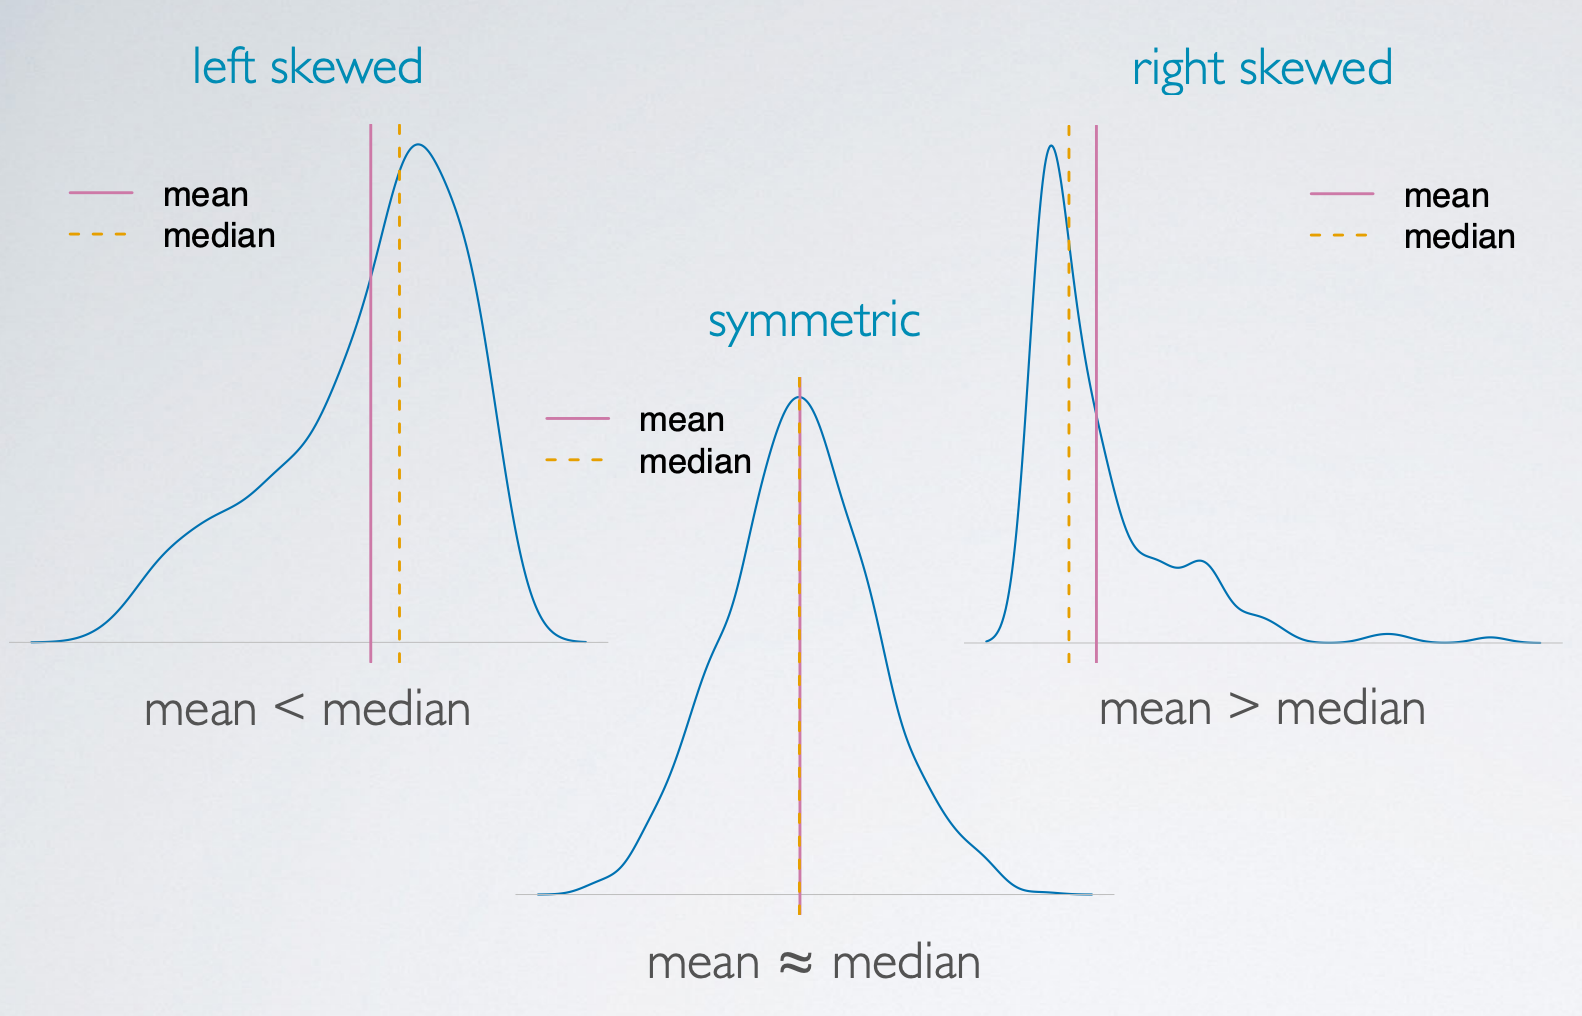

## 18. Relations of columns

### heatmap

heatmap is a good way to understand correlation.

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)

We can NA_Sales and EU_sales have much effect in Global_Sales. And NA_Sales and EU_sales are mostly corelated

### Pair plot

In [ ]:
data_pair = data.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

In [ ]:
sns.pairplot(data_pair, hue='Genre')

### log work

In [ ]:
data_pair_log = data_pair.copy()
sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']

# for column in sale_columns:
#     if 0 in data[column].unique():
#         pass
#     else:
#         data_pair_log[column] = np.log(data_pair_log[column])
# #         data_pair_log.head()

data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]

data_pair_log

In [ ]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales']);

In [ ]:
# sns.pairplot(data_pair_log, hue='Genre',  diag_kind = 'kde',
#              plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
#              size = 4)

sns.pairplot(data_pair_log, hue='Genre',  palette="husl")

Note:
You already find out that it was just a imaginary story. But truly jaber is real person, he is my room mate also and he loves game too much. I just imagin this story and made it with a little fun. Hope you like it.